In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from scipy.optimize import linear_sum_assignment

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 20, 13
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2
import seaborn as sns

import sys
sys.path.insert(0, '../../..')
import assignment
import leximin_assignment
import matrix_gen

from tqdm import tqdm

import warnings

In [2]:
def custom_eff_assignment(cost_matrix, capacities):
    full_cost_matrix = np.repeat(cost_matrix, capacities, axis=1)
    row_ind, col_ind = linear_sum_assignment(full_cost_matrix)
    
    return full_cost_matrix[row_ind, col_ind].sum()

In [6]:
N = 30
N_INTVS = 5
N_EXPERIMENTS = 1000
CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

ALPHAS = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1] # [0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1]
BETAS = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1] # [0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1]

In [8]:
pof_pop = [[[] for __ in BETAS] for _ in ALPHAS]

for a_id, a in enumerate(ALPHAS):
    for b_id, b in enumerate(BETAS):
        print(a, b)
        
        matrix_generator = matrix_gen.MatrixGenerator(
            np.random.beta, (a, b), N, N_INTVS
        )
        
        success_count = 0
        while success_count < N_EXPERIMENTS:
            # print(a, b, success_count)
            
            (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
                round_=False
            )


            # Efficient
            eff_cost = custom_eff_assignment(sorted_matrix, CAPACITIES)

            # Leximin
            lex_assigner = leximin_assignment.RowSortedLeximinAssignmentHelper(
                sorted_increase_matrix, CAPACITIES
            )
            lex_assignments = lex_assigner.solve()
            lex_cost = lex_assigner.get_cost(
                lex_assignments, cost_matrix=sorted_matrix
            )
            
            if lex_cost < eff_cost or lex_cost > 29 * eff_cost:
                continue

            
            if eff_cost == 0:
                pof_pop[a_id][b_id].append(1)
            else:
                pof_pop[a_id][b_id].append(lex_cost / eff_cost)
            success_count += 1
        
        print(np.mean(pof_pop[a_id][b_id]))

0.0001 0.0001
1.1305796127114667
0.0001 0.0003
1.0
0.0001 0.001
1.0
0.0001 0.003
1.0
0.0001 0.01
1.0
0.0001 0.03
1.0
0.0001 0.1
1.0
0.0001 0.3
1.0
0.0001 1
1.0
0.0003 0.0001
1.1138838053404527
0.0003 0.0003
1.1317813834357426
0.0003 0.001
1.0
0.0003 0.003
1.0
0.0003 0.01
1.0
0.0003 0.03
1.0
0.0003 0.1
1.0
0.0003 0.3
1.0
0.0003 1
1.0
0.001 0.0001
1.004792580272827
0.001 0.0003
1.1083189312389055
0.001 0.001
1.1474499065214088
0.001 0.003
1.0000018431092839
0.001 0.01
1.0
0.001 0.03
1.0
0.001 0.1
1.0
0.001 0.3
1.0
0.001 1
1.0
0.003 0.0001
1.0
0.003 0.0003
1.0054621146146112
0.003 0.001
1.115938458437559
0.003 0.003
1.1855301958341193
0.003 0.01
1.0000744729943691
0.003 0.03
1.0
0.003 0.1
1.0
0.003 0.3
1.0002488084273509
0.003 1
1.0
0.01 0.0001
1.0
0.01 0.0003
1.0
0.01 0.001
1.0029563333478049
0.01 0.003
1.1014630754689292
0.01 0.01
1.222789979198728
0.01 0.03
1.0008074939979457
0.01 0.1
1.000000000000258
0.01 0.3
1.0
0.01 1
1.000000000005673
0.03 0.0001
1.0
0.03 0.0003
1.0
0.03 0.001
1.0

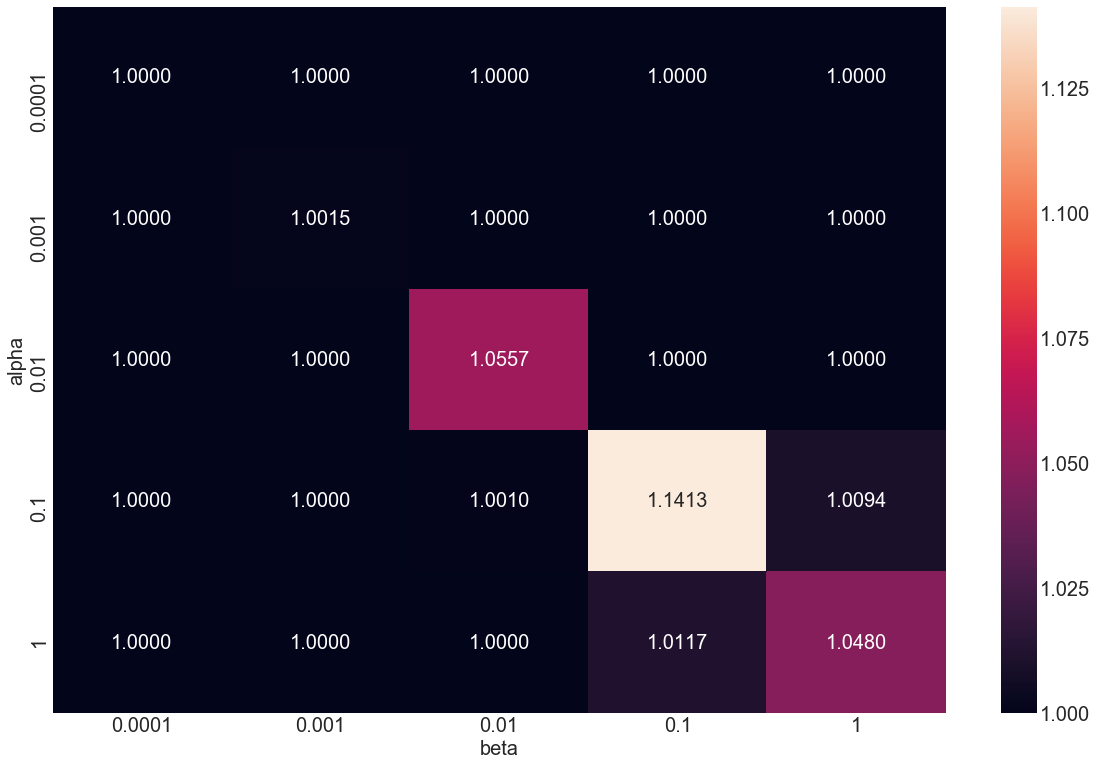

In [12]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

# Rounded matrices

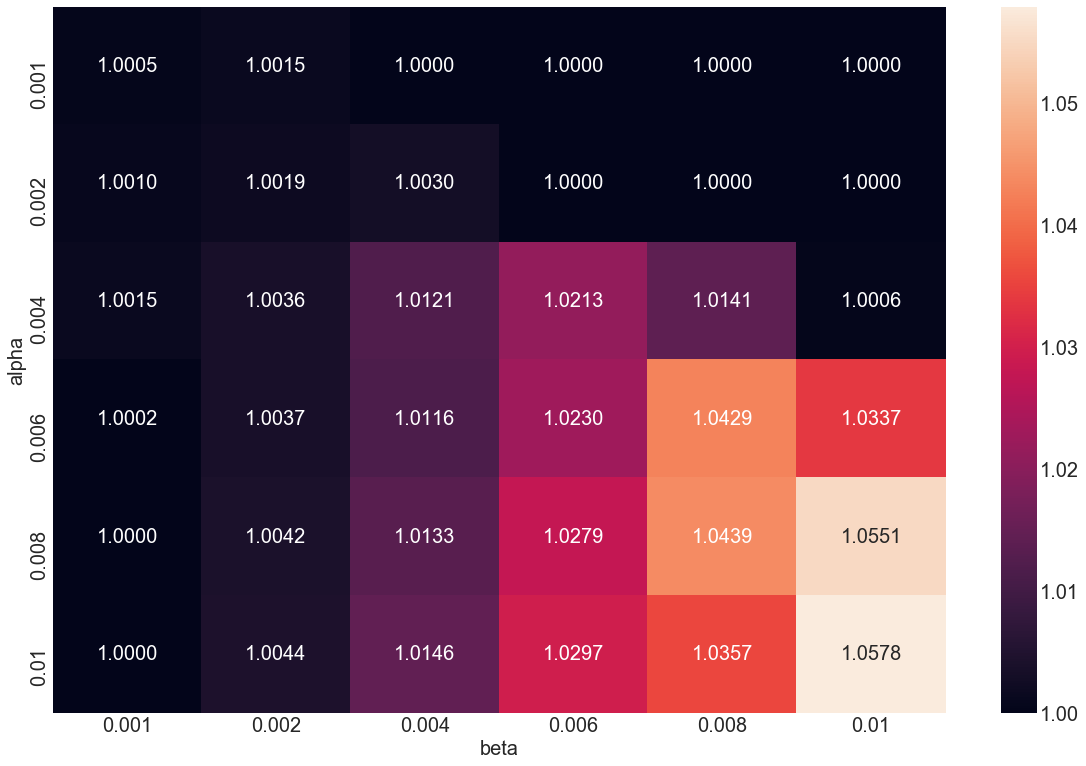

In [6]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

# Matrices that are not rounded with custom efficient assigner

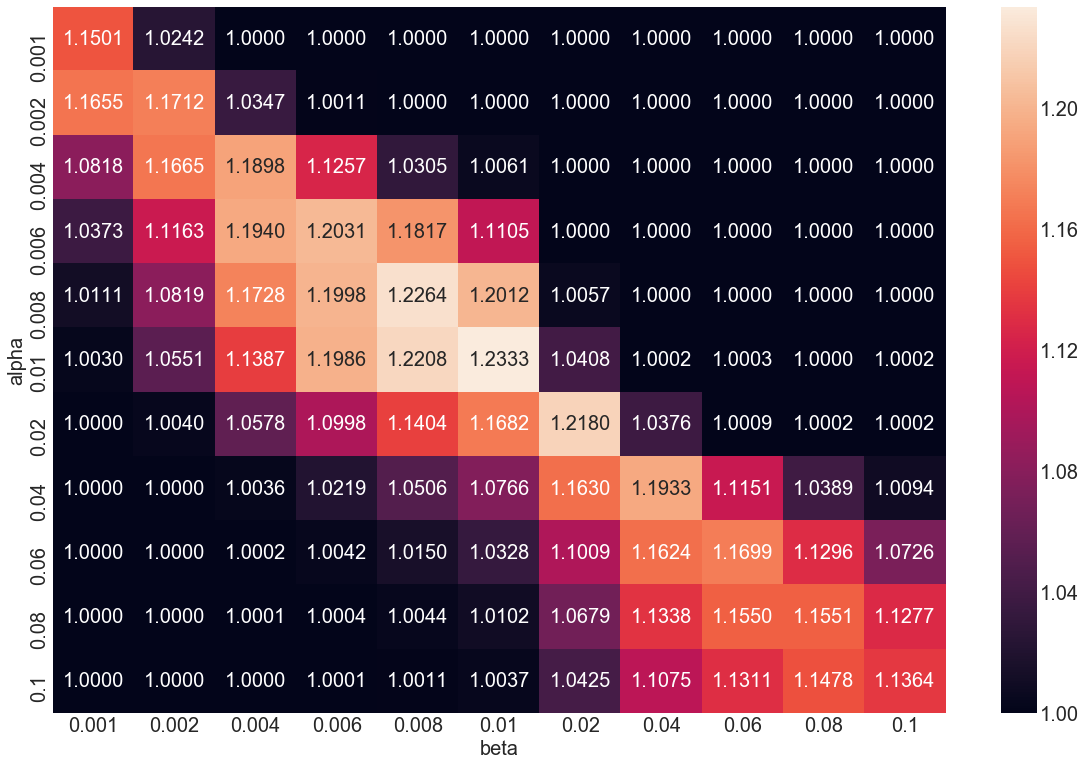

In [5]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

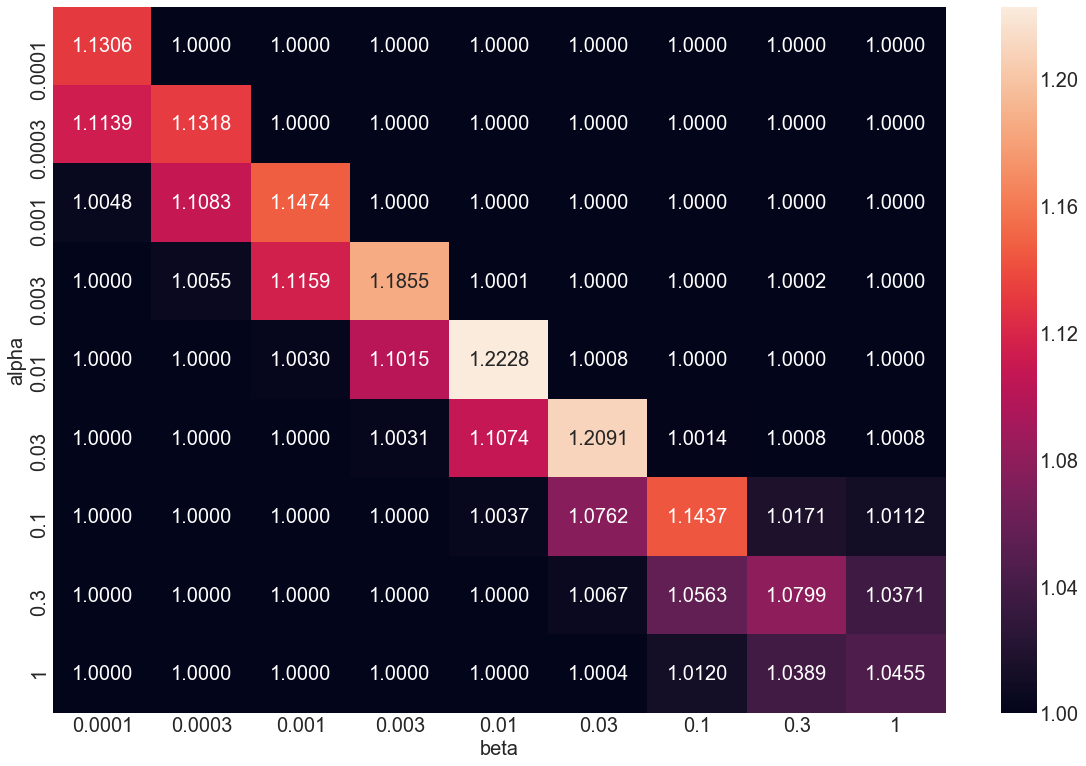

In [9]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()